In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import pandas as pd

# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/DailyDelhiClimateTrain.csv'
df_train = pd.read_csv(file_name)
print(df_train)

            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [4]:
import pandas as pd

# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/DailyDelhiClimateTest.csv'
df_test = pd.read_csv(file_name)
print(df_test)

           date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.000000
1    2017-01-02  18.500000  77.222222    2.894444   1018.277778
2    2017-01-03  17.111111  81.888889    4.016667   1018.333333
3    2017-01-04  18.700000  70.050000    4.545000   1015.700000
4    2017-01-05  18.388889  74.944444    3.300000   1014.333333
..          ...        ...        ...         ...           ...
109  2017-04-20  34.500000  27.500000    5.562500    998.625000
110  2017-04-21  34.250000  39.375000    6.962500    999.875000
111  2017-04-22  32.900000  40.900000    8.890000   1001.600000
112  2017-04-23  32.875000  27.500000    9.962500   1002.125000
113  2017-04-24  32.000000  27.142857   12.157143   1004.142857

[114 rows x 5 columns]


In [73]:
train_data = df_train
test_data = df_test

In [74]:
features = ['meantemp', 'wind_speed', 'meanpressure']
target = 'humidity'

In [75]:
# train, test 

X_train = train_data[features].values
y_train = train_data[target].values
X_test = test_data[features].values

In [77]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 생성
scaler = MinMaxScaler(feature_range=(0, 1))

# 데이터 정규화
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


[ RNN ]

In [78]:
# RNN 모델 
model = Sequential()
model.add(SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(1))

In [80]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [81]:
# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
23/23 [==============================] - 6s 7ms/step - loss: 3835.8474
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 3173.3079
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 1345.6940
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 684.1794
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 602.8154
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 554.5089
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 511.8564
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 465.9852
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 413.6780
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 360.8764
Epoch 11/100
23/23 [==============================] - 0s 4ms/step - loss: 305.4314
Epoch 12/100
23/23 [==============================] - 0s 6ms/step - loss: 257.6043
Epoch 13/1

23/23 [==============================] - 0s 7ms/step - loss: 169.3997
Epoch 100/100
23/23 [==============================] - 0s 6ms/step - loss: 170.2842


In [82]:
# 테스트 데이터
predicted_humidity = model.predict(X_test)

4/4 [==============================] - 1s 5ms/step


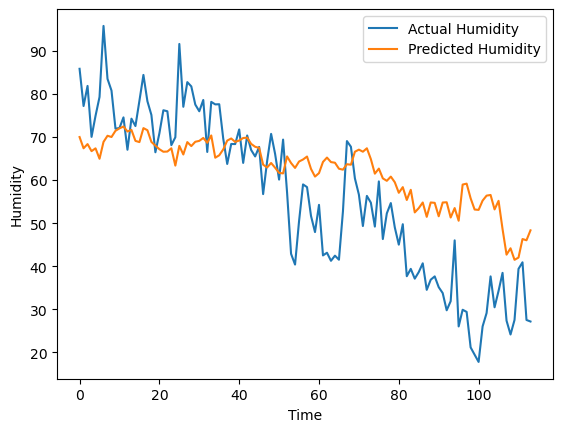

In [83]:
# 결과 그래프 시각화
plt.plot(test_data.index, test_data[target], label='Actual Humidity')
plt.plot(test_data.index, predicted_humidity, label='Predicted Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()